<a href="https://colab.research.google.com/github/NguyenMinh2804/CS114.L22.KHCL/blob/main/plot_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [21]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



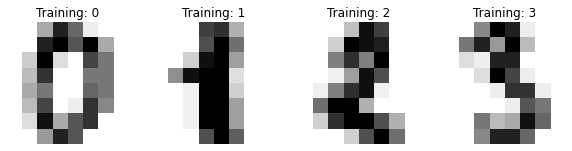

In [22]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [23]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



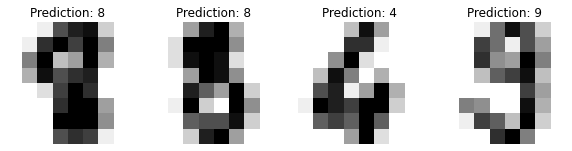

In [24]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [25]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


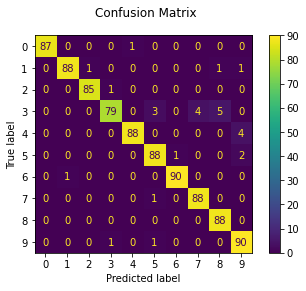

In [26]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [27]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


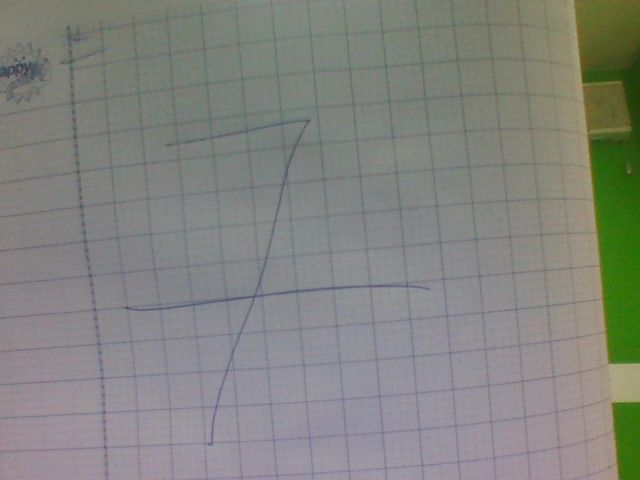

In [28]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

def getBlackWhiteImage(input, output):
    image = cv2.imread(input)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)
    ret, ostu_thresh = cv2.threshold(image_blur, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.figure(figsize=(16,8))
    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title("Image original")
    plt.subplot(1, 4, 2)
    plt.imshow(image_gray, cmap=plt.cm.binary)
    plt.title("Image gray")
    plt.subplot(1, 4, 3)
    plt.imshow(image_blur, cmap=plt.cm.binary)
    plt.title("Image blur")
    plt.subplot(1, 4, 4)
    plt.imshow(ostu_thresh, cmap=plt.cm.binary)
    plt.title("Text: White, Background: Black")
    plt.show() 
    cv2.imwrite(output, ostu_thresh)
    return
def convertWhiteBlackImage(input, output):
    image = Image.open(input)
    image_result = ImageOps.invert(image)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title("Text: White, Background: Black")
    plt.subplot(1, 2, 2)
    plt.imshow(image_result, cmap=plt.cm.binary)
    plt.title("Text: Black, Background: White")
    plt.show()
    image_result.save(output)
    return

def getResult(input):
    image = cv2.imread(input, cv2.IMREAD_GRAYSCALE)
    image_8_8 = cv2.resize(image, (8, 8), interpolation = cv2.INTER_AREA)
    image_8_8 = image_8_8 / np.max(image_8_8)
    image_predict = image_8_8.reshape(1, 64)
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title("Text: Black, Background: White")
    plt.subplot(1, 3, 2)
    plt.imshow(image_8_8, cmap=plt.cm.binary)
    plt.title("Image 8x8")
    result = clf.predict(image_predict)[0]
    plt.subplot(1, 3, 3)
    plt.imshow(image_8_8, cmap=plt.cm.binary)
    plt.title(f"Prediction: {result}")
    plt.show()
    print("Result: ", result)
    return

<IPython.core.display.Javascript object>

STEP 1: Convert to Text: White, Background: Black


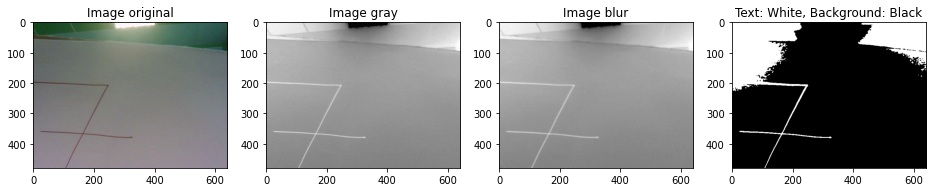

STEP 2: Convert to Text: Black, Background: White


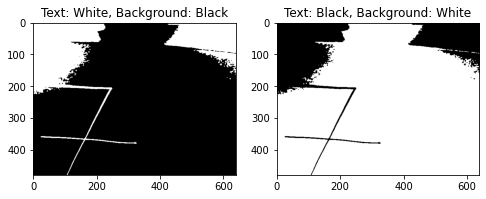

STEP 3: Get result


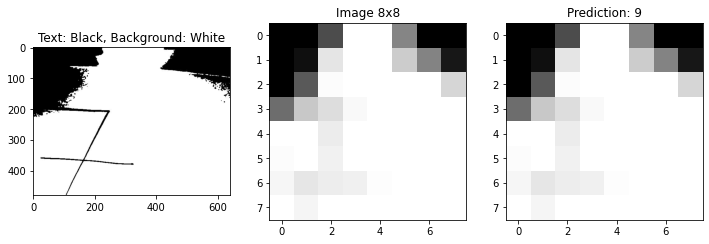

Result:  9


In [35]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os

try:
  image = take_photo()
  image_text_black = "temp_b.jpg"
  image_text_white = "temp_w.jpg"
  print("STEP 1: Convert to Text: White, Background: Black")
  getBlackWhiteImage(image, image_text_black)
  print("STEP 2: Convert to Text: Black, Background: White")
  convertWhiteBlackImage(image_text_black, image_text_white)
  print("STEP 3: Get result")
  getResult(image_text_white)
  #Delete_temp
  os.remove(image_text_black)
  os.remove(image_text_white)

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))